In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Set a nice style for the plots
sns.set_theme(style="whitegrid", palette="viridis")

In [3]:
try:
    data = pd.read_csv("darjeeling_wheat_combined.csv")
    print("✅ Dataset loaded successfully!")
    display(data.head())
except FileNotFoundError:
    print("❌ Error: 'darjeeling_wheat_combined.csv' not found.")
    print("Please make sure the CSV file is in the same directory as your Jupyter Notebook.")

✅ Dataset loaded successfully!


,Year,District,Wheat_Yield_t_ha,year,precipitation_flowering,precipitation_growth,precipitation_harvest,precipitation_sowing,LST_flowering,LST_growth,LST_harvest,LST_sowing
0,2001,Darjeeling,2.50,2001,0.787679,0.079348,2.044419,0.003871,24.977643,18.051000,26.238129,19.150710
1,2002,Darjeeling,2.55,2002,0.356429,0.134717,3.026677,0.002032,23.700321,18.296326,21.281774,21.226226
2,2003,Darjeeling,2.48,2003,1.453964,0.114130,1.571355,0.000000,22.273786,14.105543,24.950516,19.439548
3,2004,Darjeeling,2.60,2004,1.131414,0.009348,2.006000,0.012839,23.807483,16.590043,21.675710,20.256774
4,2005,Darjeeling,2.58,2005,0.348107,0.003217,1.752710,0.011871,23.873286,18.176413,25.147065,20.331839


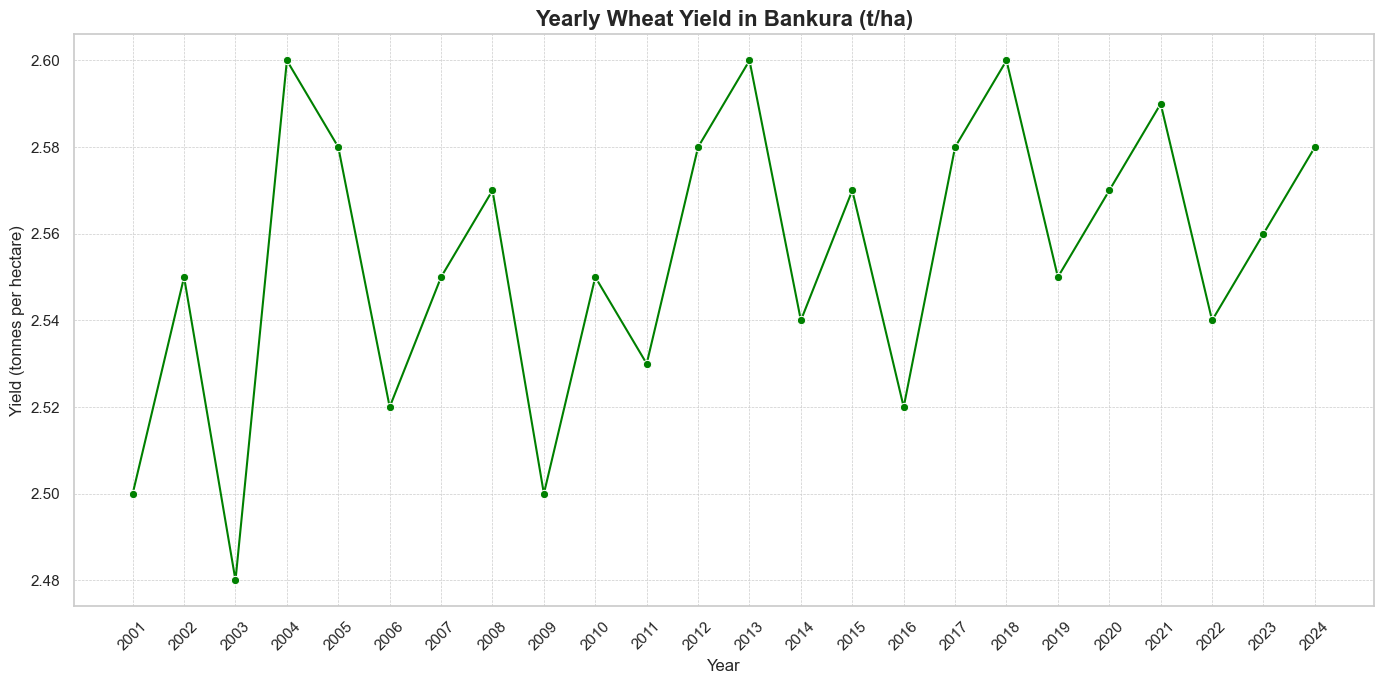

In [4]:
# Set the figure size for a wider plot
plt.figure(figsize=(14, 7))

# Create the plot using seaborn for a nice look
sns.lineplot(data=data, x='year', y='Wheat_Yield_t_ha', marker='o', color='g')

# Add titles and labels for clarity
plt.title('Yearly Wheat Yield in Bankura (t/ha)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yield (tonnes per hectare)', fontsize=12)
plt.xticks(data['year'], rotation=45) # Ensure all years are shown on the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [5]:
# The name of your yield column
YIELD_COLUMN_NAME = 'Wheat_Yield_t_ha'

# Define the climate features (X) and the target variable (y)
features = [
    'LST_sowing', 'precipitation_sowing',
    'LST_growth', 'precipitation_growth',
    'LST_flowering', 'precipitation_flowering',
    'LST_harvest', 'precipitation_harvest'
]

# Drop any rows with missing data to ensure the model runs smoothly
data.dropna(subset=features + [YIELD_COLUMN_NAME], inplace=True)

X = data[features]
y = data[YIELD_COLUMN_NAME]

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data prepared for modeling:")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Data prepared for modeling:
Number of training samples: 19
Number of testing samples: 5


In [6]:
# Initialize the model with 100 decision trees
# random_state=42 ensures that the results are reproducible
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model on the training data
rf_model.fit(X_train, y_train)

print("✅ Random Forest model has been successfully trained!")

✅ Random Forest model has been successfully trained!


In [7]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("📈 Model Performance Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"\nThis means our model can explain {r2:.1%} of the variance in wheat yield.")

📈 Model Performance Evaluation:
Mean Absolute Error (MAE): 0.035
R-squared (R²): -0.217

This means our model can explain -21.7% of the variance in wheat yield.



🔍 Feature Importance Rankings:


,Feature,Importance
1,precipitation_sowing,0.380752
5,precipitation_flowering,0.150673
6,LST_harvest,0.111758
3,precipitation_growth,0.084202
2,LST_growth,0.072296
0,LST_sowing,0.071207
4,LST_flowering,0.065214
7,precipitation_harvest,0.063898


C:\Users\RAIKAT\AppData\Local\Temp\ipykernel_22808\3110633580.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')


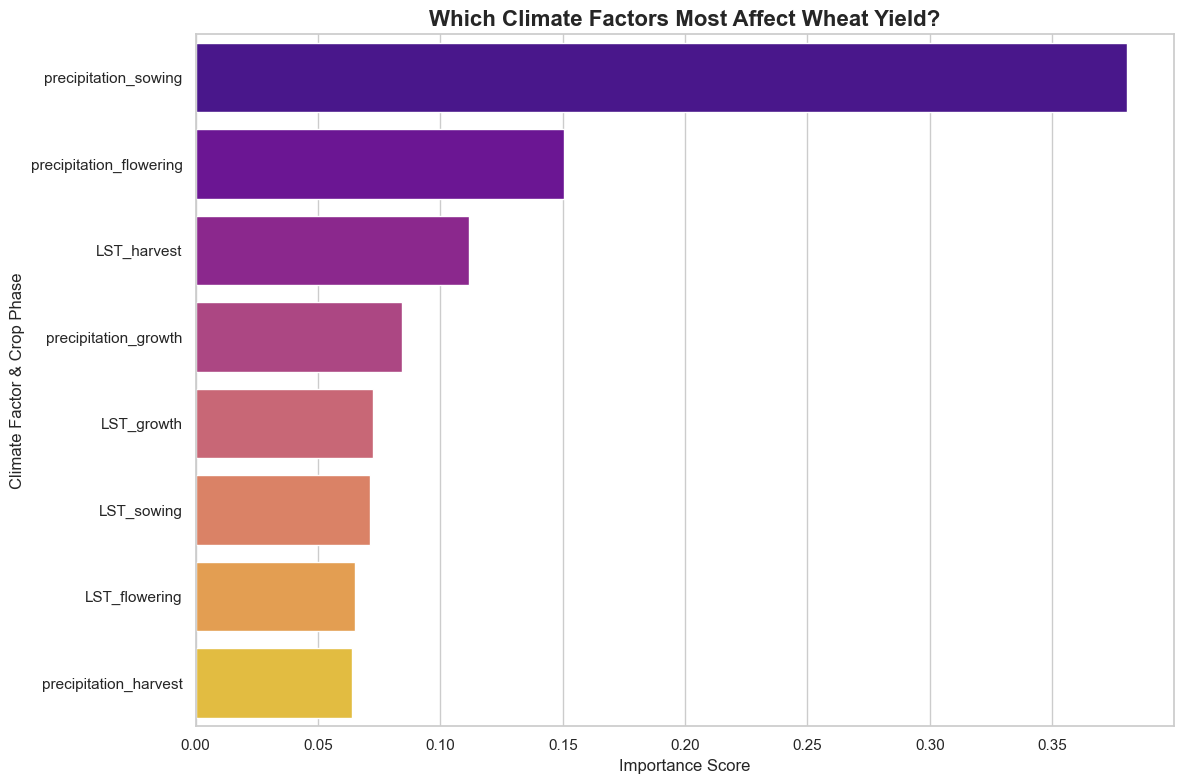

In [8]:
# Get importance scores from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for easier handling and sorting
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n🔍 Feature Importance Rankings:")
display(feature_importance_df)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')

# Add titles and labels
plt.title('Which Climate Factors Most Affect Wheat Yield?', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Climate Factor & Crop Phase', fontsize=12)
plt.tight_layout()
plt.show()

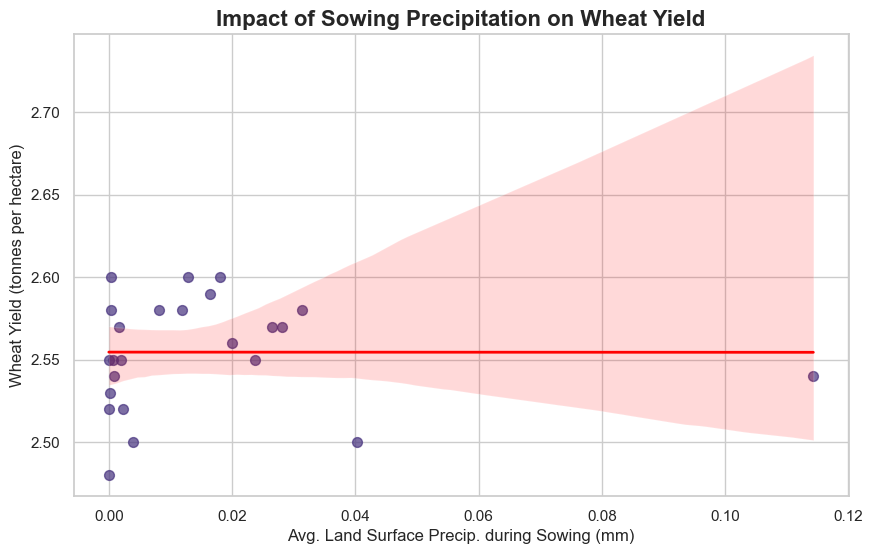

In [11]:
# Create a regression plot for the most important feature
plt.figure(figsize=(10, 6))

# Use seaborn's regplot to create a scatter plot with a fitted regression line
sns.regplot(data=data, x='precipitation_sowing', y='Wheat_Yield_t_ha', 
            scatter_kws={'s': 50, 'alpha': 0.7}, 
            line_kws={'color': 'red', 'lw': 2})

plt.title('Impact of Sowing Precipitation on Wheat Yield', fontsize=16, weight='bold')
plt.xlabel('Avg. Land Surface Precip. during Sowing (mm)', fontsize=12)
plt.ylabel('Wheat Yield (tonnes per hectare)', fontsize=12)
plt.grid(True)
plt.show()

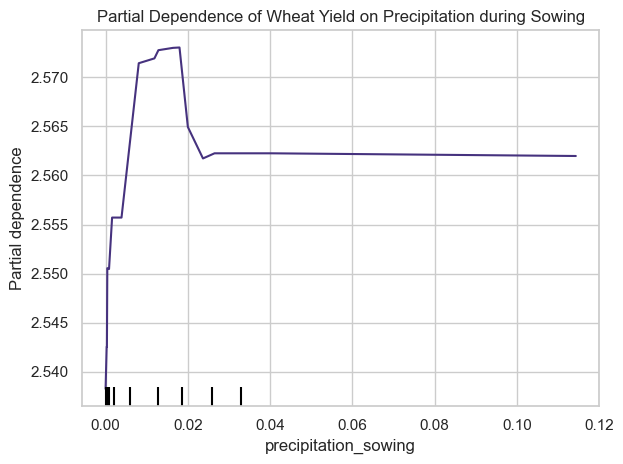

In [17]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    rf_model,
    X,
    features=['precipitation_sowing'],
    feature_names=features,
    grid_resolution=50,
    kind='average'
)
plt.title('Partial Dependence of Wheat Yield on Precipitation during Sowing')
plt.tight_layout()
plt.show()


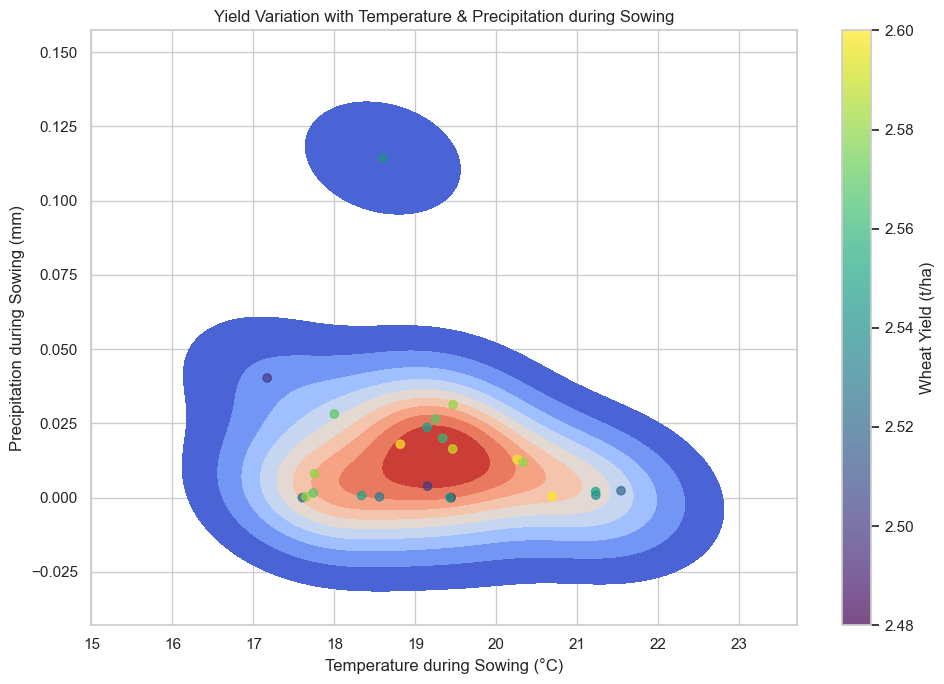

In [18]:
plt.figure(figsize=(10, 7))
sns.kdeplot(
    data=data,
    x='LST_sowing',
    y='precipitation_sowing',
    fill=True,
    thresh=0.05,
    cmap='coolwarm'
)
plt.scatter(data['LST_sowing'], data['precipitation_sowing'], 
            c=data[YIELD_COLUMN_NAME], cmap='viridis', alpha=0.7)
plt.colorbar(label='Wheat Yield (t/ha)')
plt.title('Yield Variation with Temperature & Precipitation during Sowing')
plt.xlabel('Temperature during Sowing (°C)')
plt.ylabel('Precipitation during Sowing (mm)')
plt.tight_layout()
plt.show()
